## Drosophila embryo data manipulation and reorganization
### Proteome
1. Intensity of protein expression level which is tableS11 from
> Casas-Vila, N., et al., (2017). The developmental proteome of Drosophila melanogaster. Genome research, 27(7), 1273-1285.
2. RPKM records for protein expression level in embryo, larvae, pupa, and so on which is tableS8. We only grabbed embryo data for our project.
> Casas-Vila, N., et al., (2017). The developmental proteome of Drosophila melanogaster. Genome research, 27(7), 1273-1285.

### Metabolome
1. Measurements of metabolites for each time point in 24 hours.
> Tennessen, J. M., et al., (2014). Coordinated metabolic transitions during Drosophila embryogenesis and the onset of aerobic glycolysis. G3: Genes, Genomes, Genetics, 4(5), 839-850.
2. Measurements of metabolites for each time point in 20 hours.
> An, Phan Nguyen Thuy, et al. (2014). Metabolome analysis of Drosophila melanogaster during embryogenesis. PloS one, 9(8), e99519.

### *All the data are stored inside the excel file `FlyData.xlsx`

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from MatplotProp import CanvasStyle, PltProps
PltProps()

---
### Handling the proteomic data from #1.

In [2]:
# import excel file.
tb = pd.read_excel('FlyData.xlsx',
                   sheet_name='GR_Intensity_Raw')

In [3]:
w = tb.iloc[:, 2:].shape[1]
h = tb.iloc[:, 2:].shape[0]
mat = np.zeros((h, w//4))
j = -1
for i in range(w):
    if i%4==0:
        j += 1
        mat[:, j] = tb.iloc[:, 2+i]
    else:
        mat[:, j] += tb.iloc[:, 2+i]
mat /= 4
df = pd.DataFrame(data=mat)
df.columns = [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20]
df.index = tb[tb.columns[1]]
# print the dataframe out.
df

,0,1,2,3,4,5,6,8,10,12,14,16,18,20
flybase_gene,,,,,,,,,,,,,,
Pp2A-29B,5.130600e+09,6.425975e+09,6.528475e+09,8.218625e+09,1.146762e+10,9.121725e+09,8.973000e+09,9.373125e+09,1.009972e+10,8.228875e+09,6.397350e+09,6.557875e+09,6.455725e+09,5.644650e+09
CG9577,5.604975e+09,5.856125e+09,4.399700e+09,2.782050e+09,3.786650e+09,2.333000e+09,2.137550e+09,2.649625e+09,2.621950e+09,2.840075e+09,3.112200e+09,3.098975e+09,2.310800e+09,2.553950e+09
CG9578,1.809200e+07,8.122125e+06,9.458000e+06,4.331450e+07,9.755950e+07,9.225275e+07,6.049200e+07,5.563575e+07,5.468000e+07,4.734625e+07,3.074325e+07,5.335625e+07,3.852875e+07,3.888125e+07
AnxB10,2.693275e+07,1.717300e+07,2.075100e+07,4.047125e+07,1.046890e+08,6.909700e+07,4.517275e+07,6.062600e+07,4.751880e+07,8.877850e+07,6.041050e+07,3.730125e+07,6.322892e+07,2.579038e+07
CG9581,3.680525e+09,3.870450e+09,3.784525e+09,1.595575e+09,2.171575e+09,1.538100e+09,1.627462e+09,1.517850e+09,1.154190e+09,1.522505e+09,1.381288e+09,1.339500e+09,9.093725e+08,1.474300e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.000000e+00,0.000000e+00,0.000000e+00,7.973250e+06,3.318500e+07,4.123250e+06,1.143948e+07,1.754575e+06,0.000000e+00,0.000000e+00,6.557250e+06,0.000000e+00,0.000000e+00,2.067200e+07
NaN,2.514400e+08,2.651220e+08,5.940100e+08,3.874150e+08,5.798225e+08,4.273575e+08,4.009525e+08,3.263675e+08,3.845200e+08,3.281750e+08,3.179700e+08,3.772300e+08,3.670675e+08,3.599700e+08
NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.014275e+07,1.889050e+08,1.515125e+07,2.776940e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.432075e+07,0.000000e+00,0.000000e+00,5.443325e+06


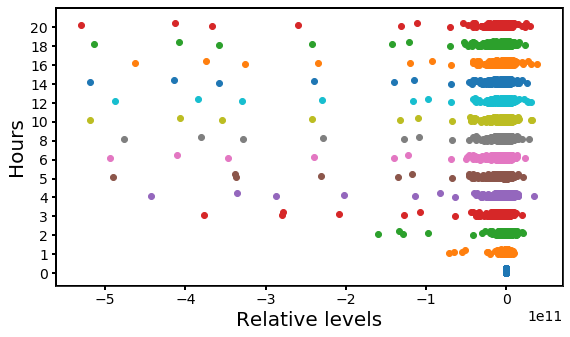

In [14]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
basal = df[df.columns[0]].copy()
for col in df.columns:
    y = np.random.rand(len(df[col]))
    df[col] = df[col]-basal
for i in range(df.shape[1]):
    ax.scatter(df.iloc[:, i], 4*i+y)#, linewidth=3)
CanvasStyle(ax, square=True)
ax.set_yticks(np.linspace(0, 4*(df.shape[1]-1), 14))
ax.set_yticklabels(df.columns)
ax.set_ylabel('Hours')
ax.set_xlabel('Relative levels')
plt.show()

In [16]:
up = {}
dw = {}
for col in df.columns:
    up[col] = (df.index[(df[col]>0) & (df.index.isnull()==0)]).to_numpy()
    dw[col] = (df.index[(df[col]<0) & (df.index.isnull()==0)]).to_numpy()
    
file_names = ['UPregProteome', 'DWregProteome']
up_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in up.items() ]))
dw_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dw.items() ]))
up_df.to_excel(u'Proteome_CFR/{}.xlsx'.format(file_names[0]), sheet_name='upreg')
dw_df.to_excel(u'Proteome_CFR/{}.xlsx'.format(file_names[1]), sheet_name='dwreg')
type(dw_df[2][0])

str

---
### Handling the proteomic data quantified by RPKM from #2.

In [17]:
# import excel file.
tb = pd.read_excel('FlyData.xlsx',
                   sheet_name='GR_RPKM_Raw')

In [18]:
df = pd.DataFrame(data=tb.iloc[:, 1:5])
df.columns = [0, 4, 10, 18]
df.index = tb['gene']
# print the dataframe out.
df

,0,4,10,18
gene,,,,
CG17829,5.956429,5.983824,4.662691,3.738486
Roc1a,7.000347,7.674617,7.106746,5.796782
CDC45L,6.763571,5.125874,3.489980,2.263401
fs(1)N,5.716437,0.645122,0.301229,0.285890
png,6.845478,2.270702,0.813353,0.569158
...,...,...,...,...
Su(var)3-9,7.413991,7.932694,8.191135,6.357257
CG18586,4.859383,0.516761,0.131472,0.122151
cmet,4.244605,4.330142,2.151800,0.657936


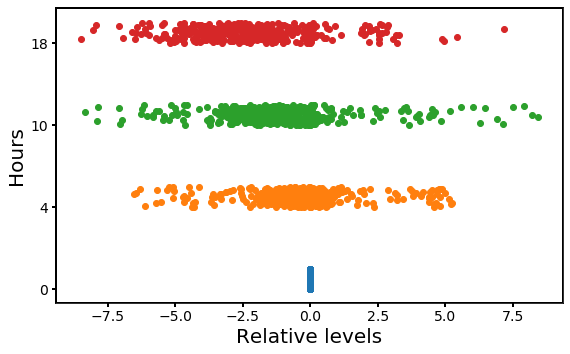

In [21]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
basal = df[df.columns[0]].copy()
for col in df.columns:
    y = np.random.rand(len(df[col]))
    df[col] = df[col]-basal
for i in range(df.shape[1]):
    ax.scatter(df.iloc[:, i], 4*i+y)#, linewidth=3)
CanvasStyle(ax, square=True)
ax.set_yticks(np.linspace(0, 4*(df.shape[1]-1), 4))
ax.set_yticklabels(df.columns)
ax.set_ylabel('Hours')
ax.set_xlabel('Relative levels')
plt.show()

In [20]:
up = {}
dw = {}
for col in df.columns:
    up[col] = (df.index[(df[col]>0) & (df.index.isnull()==0)]).to_numpy()
    dw[col] = (df.index[(df[col]<0) & (df.index.isnull()==0)]).to_numpy()
    
file_names = ['UPRPKMProteome', 'DWRPKMProteome']
up_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in up.items() ]))
dw_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dw.items() ]))
up_df.to_excel(u'Proteome_CFR/{}.xlsx'.format(file_names[0]), sheet_name='upreg')
dw_df.to_excel(u'Proteome_CFR/{}.xlsx'.format(file_names[1]), sheet_name='dwreg')